<a href="https://colab.research.google.com/github/siddharthgangwar25/Predicting-Car-Pricing-based-on-Features/blob/master/CarPricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Exploratory Data Analysis of Car Features**

#### **Problem Statement**

Perform Exploratory Data
Analysis on the dataset to determine how the different features of a car and its price are related, and also predict pricing of a car.

####**About the Dataset**
The data contains more of 10, 000 rows and more than 10 columns which contains features of the car such as Engine Fuel Type, Engine HP, Transmission Type, highway MPG, city MPG and many more.

## Importing the required libraries

In [90]:
import numpy as np
import pandas as pd               #For Dataset manipuation
import matplotlib.pyplot as plt   #For visualization
import seaborn as sns             #For visualization
%matplotlib inline

## Importing the dataset

In [2]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


In [91]:
import io
df = pd.read_csv(io.BytesIO(uploaded['data.csv']))
df.head()   #To display top 5 rows

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


##Descirbing and checking the data type
We descirbe the data and check if columns are allocated to corresponding data types.

In [ ]:
df.describe()   #To describe the dataset

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [ ]:
df.info()   #To check the data type info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

##Dropping irrelevant columns
This step is important because it is efficient to drop the columns which may not affect the predictions.

In [92]:
df = df.drop(['Engine Fuel Type', 'Number of Doors','Market Category'], axis=1)
df.head(5)

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500


##Renaming the columns

In [93]:
df = df.rename(columns={"Engine HP": "HP", "Engine Cylinders": "Cylinders", "Transmission Type": "Transmission", "Driven_Wheels": "Drive Mode","highway MPG": "MPG-H", "city mpg": "MPG-C", "MSRP": "Price"})
df.head(5)

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500


##Dropping the duplicate rows
We drop the rows that are duplicate which usually happens in large datasets.

In [ ]:
df.shape

(11914, 13)

In [ ]:
duplicate_rows=df[df.duplicated()]
print("Number of Duplicate Rows: ", duplicate_rows.shape)

Number of Duplicate Rows:  (792, 13)


In [94]:
#Removing the duplicate rows in the dataset
df=df.drop_duplicates()
df.shape

(11122, 13)

##Dropping Null values
We find the number of null/missing values and drop them from the dataset.

In [ ]:
print(df.isnull().sum())  #Number of missing values

Make              0
Model             0
Year              0
HP               69
Cylinders        30
Transmission      0
Drive Mode        0
Vehicle Size      0
Vehicle Style     0
MPG-H             0
MPG-C             0
Popularity        0
Price             0
dtype: int64


In [95]:
df = df.dropna()  #Dropping the missing values.
df.count()

Make             11024
Model            11024
Year             11024
HP               11024
Cylinders        11024
Transmission     11024
Drive Mode       11024
Vehicle Size     11024
Vehicle Style    11024
MPG-H            11024
MPG-C            11024
Popularity       11024
Price            11024
dtype: int64

In [96]:
print(df.isnull().sum()) #Current number of missing values

Make             0
Model            0
Year             0
HP               0
Cylinders        0
Transmission     0
Drive Mode       0
Vehicle Size     0
Vehicle Style    0
MPG-H            0
MPG-C            0
Popularity       0
Price            0
dtype: int64


##Detecting Outliers
An outlier is a data point that differs significantly from other observations. We detect the outliers uing visualization methods (Box Plot) and remove the outliers using IQR score.

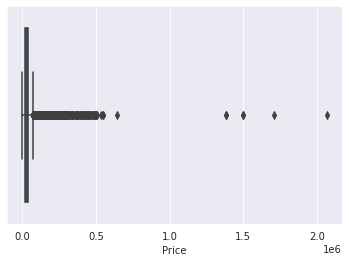

In [97]:
#Plotting Box Plots
sns.boxplot(x=df['Price'])

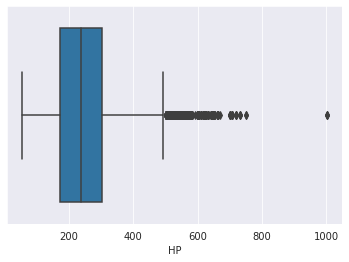

In [98]:
sns.boxplot(x=df['HP'])

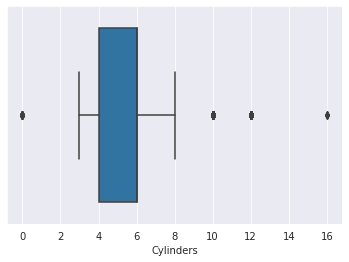

In [99]:
sns.boxplot(x=df['Cylinders'])

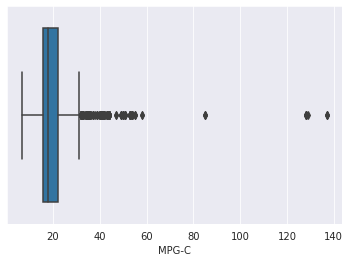

In [100]:
sns.boxplot(x=df['MPG-C'])

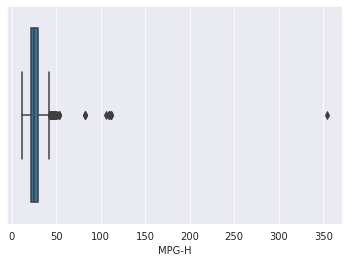

In [101]:
sns.boxplot(x=df['MPG-H'])

In [102]:
#IQR Scores
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR= Q3 - Q1
print(IQR)

Year              9.00
HP              131.00
Cylinders         2.00
MPG-H             8.00
MPG-C             6.00
Popularity     1460.00
Price         21426.25
dtype: float64


In [103]:
#Removing outliers
df=df[~((df < (Q1 - 1.5 * IQR))|(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(8546, 13)

##Top 10 most represented car brands

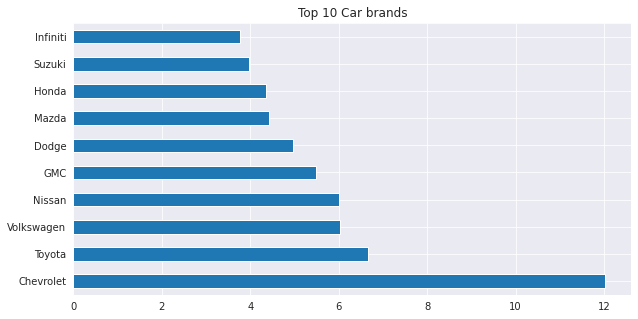

In [104]:
#Percentage of cars per make
percentage=df['Make'].value_counts()*100/sum(df['Make'].value_counts())

#Plot the Top 10 Car Brands (in percentage)
plt.figure(figsize=(10,5))
percentage[:10].plot(kind='barh')
plt.title('Top 10 Car brands')
plt.show()

##Average price among Top 10 car brands

In [105]:
Avg_prices=df[['Make','Price']].loc[(df['Make'] == 'Chevrolet')|(df['Make'] == 'Toyota')|(df['Make'] == 'Volkswagen')|(df['Make'] == 'Nissan')|(df['Make'] == 'GMC')|(df['Make'] == 'Dodge')|(df['Make'] == 'Mazda')|(df['Make'] == 'Honda')|(df['Make'] == 'Suzuki')|(df['Make'] == 'Infiniti')]
Avg_prices=Avg_prices.groupby(['Make']).mean()  #Taking mean of the prices
Avg_prices

,Price
Make,
Chevrolet,28142.855891
Dodge,26076.722353
GMC,33261.400853
Honda,27381.364611
Infiniti,43127.822981
Mazda,20495.820106
Nissan,28352.543860
Suzuki,18168.241888
Toyota,27769.421793


##Correlation Matrix

In [106]:
df.corr()

,Year,HP,Cylinders,MPG-H,MPG-C,Popularity,Price
Year,1.000000,0.325104,-0.106597,0.373319,0.335236,0.200710,0.591439
HP,0.325104,1.000000,0.734094,-0.453451,-0.554768,0.095161,0.745852
Cylinders,-0.106597,0.734094,1.000000,-0.691395,-0.746361,0.013373,0.389049
MPG-H,0.373319,-0.453451,-0.691395,1.000000,0.936978,0.093002,-0.121262
MPG-C,0.335236,-0.554768,-0.746361,0.936978,1.000000,0.081110,-0.197330
Popularity,0.200710,0.095161,0.013373,0.093002,0.081110,1.000000,0.113604
Price,0.591439,0.745852,0.389049,-0.121262,-0.197330,0.113604,1.000000


The correlation matrix shows High correlation between Horsepower and Cylinders i.e. 0.734094, this may show that the more cylinders a car has, more powerful the car is. There is High correlation between Highway MPG and City MPG i.e. 0.936978. Also, there is High correlation between Horsepower and Price i.e. 0.745852, means high horsepower cars are more expensive.

There is High anticorrelation between Cylinders and Highway MPG and between Cylinders and City MPG.

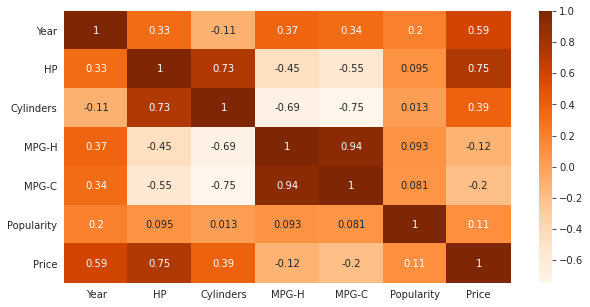

In [107]:
#Heatmap to visualize the correlation
plt.figure(figsize=(10,5))
corr=df.corr()
sns.heatmap(corr,cmap="Oranges",annot=True)

##Let's see how different variables affect the price of the car

###Horsepower and Price
The price increases with more horsepower.

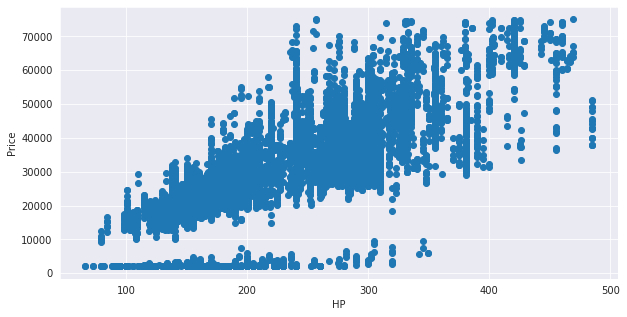

In [108]:
plt.figure(figsize=(10,5))
plt.scatter(df['HP'], df['Price'])  #Scatter plot between HP and Price
plt.xlabel('HP')
plt.ylabel('Price')
plt.show()

###Average price for different number of Cylinders
The price mostly increases with more number of cylinders.

                  Price
Cylinders              
3.0         2000.000000
4.0        25100.740791
5.0        24121.768212
6.0        33762.670890
8.0        42018.173797


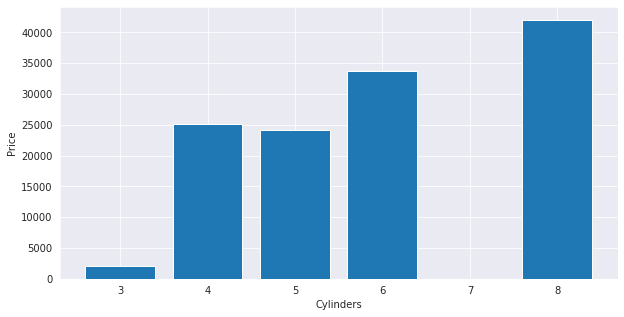

In [109]:
df1=df[['Cylinders','Price']].groupby('Cylinders').mean()  #Obtaining a new dataset with Cylinders and corresponding Average Price.
print(df1)
df1=df1.reset_index()
plt.figure(figsize=(10,5))
plt.bar(df1['Cylinders'], df1['Price'])  #Bar Graph
plt.xlabel('Cylinders')
plt.ylabel('Price')
plt.show()

###MPG-H, MPG-C and Price
There seems almost no affect of Highway MPG or City MPG on price.

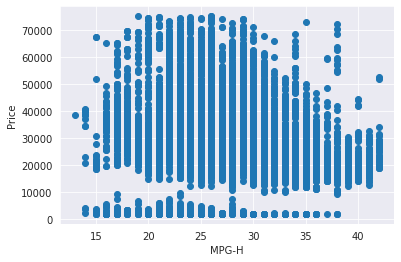

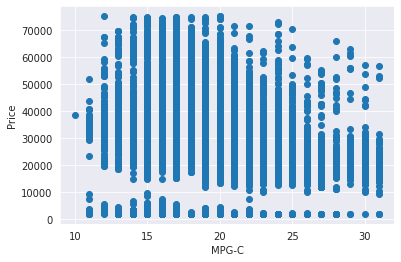

In [110]:
ax = plt.subplot()
plt.scatter(df['MPG-H'], df['Price'])  #Scatter plot between Highway MPG and Price
plt.xlabel('MPG-H')
plt.ylabel('Price')
plt.show()
ax = plt.subplot()
plt.scatter(df['MPG-C'], df['Price'])  #Scatter plot between City MPG and Price
plt.xlabel('MPG-C')
plt.ylabel('Price')
plt.show()

###Number of cars sold by Vehical Style

Text(0.5, 0, 'Vehicle Style')

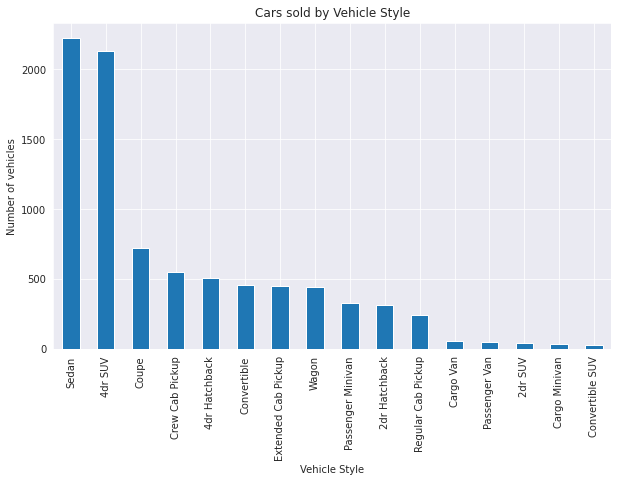

In [111]:
plt.figure(figsize=(10,6))
df['Vehicle Style'].value_counts().plot(kind='bar');
plt.title('Cars sold by Vehicle Style')
plt.ylabel('Number of vehicles')
plt.xlabel('Vehicle Style')

##Machine Learning Model

In [112]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split

In [113]:
#Label Encoding for Drive Mode
le = LabelEncoder()  
df['Drive Mode']= le.fit_transform(df['Drive Mode'])

In [114]:
X=df[['Year','HP','Cylinders','MPG-H','MPG-C','Popularity','Drive Mode']].values
y=df['Price'].values

In [115]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
scX=StandardScaler()
scy=StandardScaler()
X=scX.fit_transform(X)
y=scy.fit_transform(y.reshape(-1,1))

#Splitting the Dataset into 80:20
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size = 0.2, random_state = 0)

##Linear Regression

In [116]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

[Text(0, 0.5, 'Predicted'),
 Text(0.5, 0, 'Observed'),
 Text(0.5, 1.0, 'Observed vs. Predicted Values')]

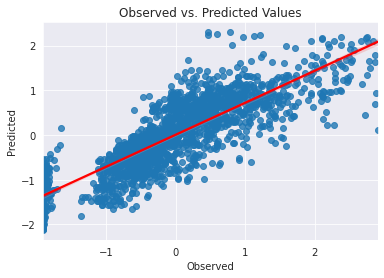

In [117]:
#Predicting Test set and comparing
y_pred=regressor.predict(X_test)
sns.regplot(x=y_test, y=y_pred, line_kws={'color': 'red'}).set(title='Observed vs. Predicted Values', xlabel='Observed', ylabel='Predicted')

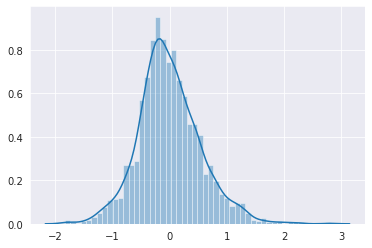

In [118]:
sns.distplot((y_test-y_pred),bins=50)

In [119]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.41694857997773577
Root Mean Squared Error: 0.5437461554972561
R2 Score: 0.6960141861289296


##Polynomial Regression

In [122]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree = 4)
X_poly=poly_reg.fit_transform(X_train)
poly_reg.fit(X_poly, y_train)
linreg2=LinearRegression()
linreg2.fit(X_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

[Text(0, 0.5, 'Predicted'), Text(0.5, 0, 'Observed')]

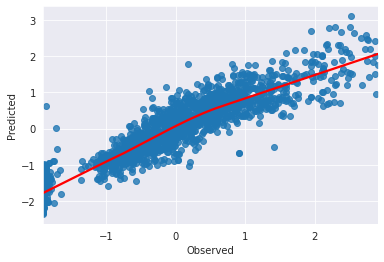

In [123]:
#Predicting
y_pred=linreg2.predict(poly_reg.fit_transform(X_test))
sns.regplot(x=y_test, y=y_pred, lowess=True, line_kws={'color': 'red'}).set(xlabel='Observed', ylabel='Predicted')

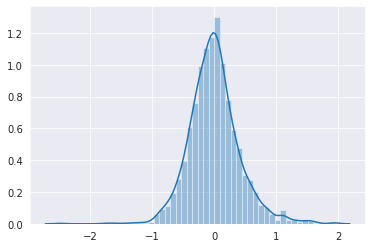

In [124]:
sns.distplot((y_test-y_pred),bins=50)

In [125]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.29993102174830194
Root Mean Squared Error: 0.4073582737663896
R2 Score: 0.8293862607213358


##Random Forest

In [126]:
from sklearn.ensemble import RandomForestRegressor
regressor2=RandomForestRegressor(n_estimators = 300, random_state = 0)
regressor2.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

Text(0, 0.5, 'Predicted')

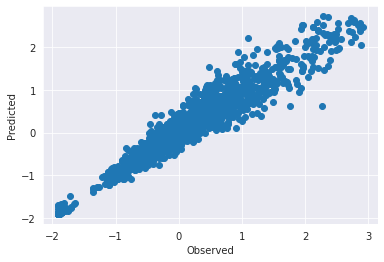

In [127]:
#Predicting
y_pred = regressor2.predict(X_test)
plt.scatter(y_test,y_pred)
plt.xlabel('Observed')
plt.ylabel('Predicted')

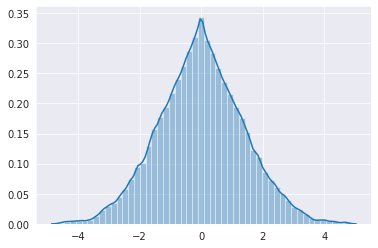

In [128]:
sns.distplot((y_test-y_pred),bins=50)

In [129]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.17710867429579882
Root Mean Squared Error: 0.24789264343158376
R2 Score: 0.9368187526821452


#*After fitting different algorithms, Random Forest Regression has shown better prediction results than other alogorithms used. It gave better Root Mean Squared Error over others.*